In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df = pd.read_csv("Walmart DataSet.csv", parse_dates=["Date"], dayfirst=True)

df_store_sales = df.groupby("Date")["Weekly_Sales"].sum().reset_index()
df_store_sales.set_index("Date", inplace=True)
df_store_sales.sort_index(inplace=True)  # Ensure chronological order




In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df_store_sales

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_store_sales['Weekly_Sales'])

In [ ]:
result[1]# data is stationary

np.float64(2.675979158986003e-07)

In [ ]:
pval = result[1]
print(pval)

2.675979158986003e-07


In [ ]:
if pval > 0.05:
  print("Data is non -stationary")
else:
  print("Data is stationary ")

Data is stationary 


In [ ]:
train =df_store_sales.iloc[:121 ]["Weekly_Sales"]  # from index 0 to 120
test = df_store_sales.iloc[121 : ]["Weekly_Sales"]

<Axes: xlabel='Date'>

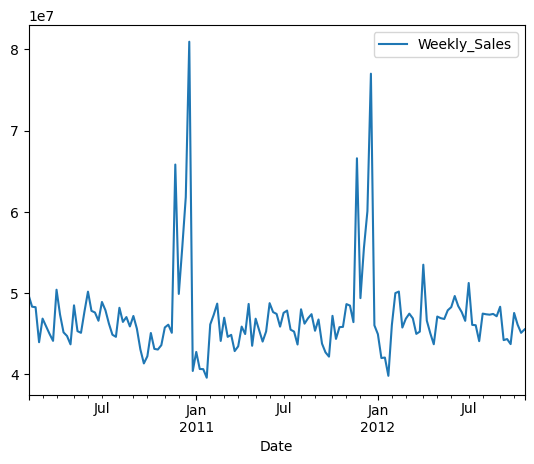

In [ ]:
df_store_sales.plot()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
train

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-04-27,43716798.89
2012-05-04,47124197.93
2012-05-11,46925878.99


In [ ]:
test

,Weekly_Sales
Date,
2012-06-01,48281649.72
2012-06-08,49651171.78
2012-06-15,48412110.70
2012-06-22,47668284.97
2012-06-29,46597112.12
2012-07-06,51253021.88
2012-07-13,46099732.10
2012-07-20,46059543.45
2012-07-27,44097154.97


In [ ]:
from sklearn.metrics import *
import itertools
p=range(0,7)
d=range(1,2)
q=range(0,7)

pdq = list(itertools.product(p,d,q))  # Create a combination of values

rmse =[ ]  # empty list to store rmse score with different different p,d,q, value
order_list=[ ]  # list to store combination of p,d,1

for i in pdq:
  model_2 = ARIMA(train , order=i)  # passing combination of p,d,q
  model_2=model_2.fit()   # Training the model
  pred = model_2.predict(start = len(train)  , end = len(train)+len(test)-1 )  # Making prediction
  error = np.sqrt(mean_squared_error(test,pred))  # calculating rmse between actual and predicted value
  order_list.append(i)
  rmse.append(error)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [ ]:
result = pd.DataFrame(index=order_list , data = rmse, columns=["RMSE"])
result=result.sort_values(by="RMSE",ascending=True)

In [ ]:
result

,RMSE
"(4, 1, 4)",1.796040e+06
"(6, 1, 5)",1.797092e+06
"(2, 1, 4)",1.821265e+06
"(4, 1, 3)",1.828558e+06
"(2, 1, 3)",1.832498e+06
"(2, 1, 1)",1.842370e+06
"(0, 1, 2)",1.853923e+06
"(1, 1, 5)",1.854871e+06
"(1, 1, 6)",1.856279e+06
"(6, 1, 6)",1.857845e+06


In [ ]:
model_3 = ARIMA(train , order=( 4, 1 , 4 ))
model_3= model_3.fit()
df_store_sales["ARIME PREDICTION"]=model_3.predict(start=len(train) , end = len(train)+len(test)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [ ]:
df_store_sales.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Weekly_Sales      143 non-null    float64
 1   ARIME PREDICTION  22 non-null     float64
dtypes: float64(2)
memory usage: 3.4 KB


<Axes: xlabel='Date'>

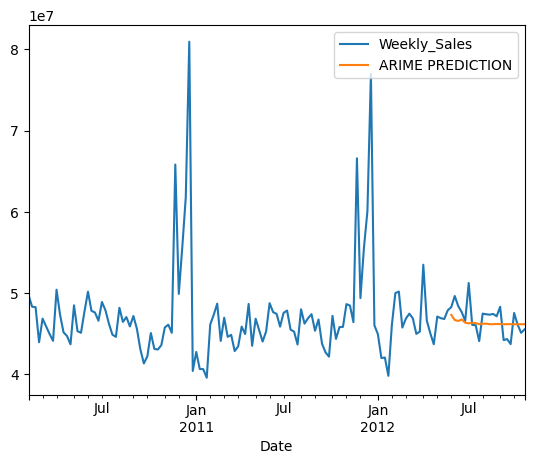

In [ ]:
df_store_sales[ ["Weekly_Sales" , "ARIME PREDICTION"]].plot()#clearly this model is not capturing seasonality properly so i am Switching to the SARIMAX model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools
import numpy as np
from joblib import Parallel, delayed

# Reduce search space for faster execution
p = range(0, 3)   # Reduce p to (0,1,2)
d = range(1, 2)   # Keep d minimal (1)
q = range(0, 3)   # Reduce q to (0,1,2)
P = range(0, 2)   # Reduce seasonal P
D = range(0, 2)   # Seasonal differencing
Q = range(0, 2)   # Reduce seasonal Q
s = [52]          # Seasonality (weekly data)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))

# Store best results
best_rmse = float("inf")
best_order = None
best_seasonal_order = None

# Function to fit and evaluate SARIMAX
def evaluate_sarimax(order, seasonal_order):
    try:
        model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False, low_memory=True)  # Faster training

        # Predictions
        pred = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

        # RMSE calculation
        error = np.sqrt(mean_squared_error(test, pred))

        print(f"SARIMAX{order}x{seasonal_order} - RMSE: {error:.4f}")
        return order, seasonal_order, error

    except Exception as e:
        print(f"Error with SARIMAX{order}x{seasonal_order}: {e}")
        return None

# Run models in parallel to save time
results = Parallel(n_jobs=-1)(
    delayed(evaluate_sarimax)(param, seasonal_param) for param in pdq for seasonal_param in seasonal_pdq
)

# Filter out errors
results = [res for res in results if res is not None]

# Find the best model
for order, seasonal_order, rmse in results:
    if rmse < best_rmse:
        best_rmse = rmse
        best_order = order
        best_seasonal_order = seasonal_order

# Print best model
print("\nBest SARIMAX Order:", best_order)
print("Best Seasonal Order:", best_seasonal_order)
print("Best RMSE:", best_rmse)



Best SARIMAX Order: (2, 1, 1)
Best Seasonal Order: (1, 0, 0, 52)
Best RMSE: 1341374.4741274407


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX( train , order =(2,1,1) , seasonal_order =(1,1,0,52))

model = model.fit()
df_store_sales["SARIMAX PREDICTION"] = model.predict(start=len(train) , end = len(train)+len(test)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

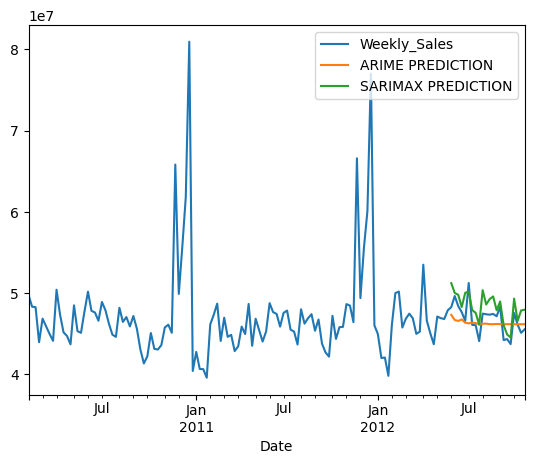

In [ ]:
df_store_sales[ ["Weekly_Sales" , "ARIME PREDICTION" , "SARIMAX PREDICTION"]].plot()

In [ ]:
#5 years prediction for ARIMA and SArimax model

<Axes: xlabel='Date'>

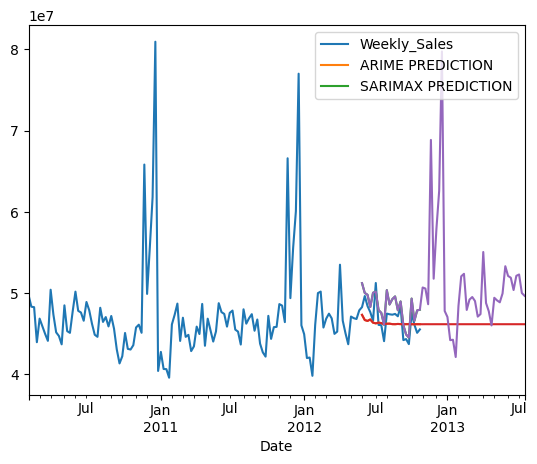

In [ ]:
future = model_3.forecast(steps=60)
future2=model.forecast(steps=60)
df_store_sales.plot()
future.plot()
future2.plot()

In [ ]:
#clearly sarimax is performing much better than Arima

NameError: name 'new_sales' is not defined

In [ ]:
import joblib

# Save the trained SARIMAX model
joblib.dump(model_fit, "sarimax_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
# Load the saved model
loaded_model = joblib.load("sarimax_model.pkl")

# Make predictions using the loaded model
predictions = loaded_model.predict(start=len(train), end=len(train) + len(test) - 1)


In [ ]:
predictions

,predicted_mean
2012-06-01,5.121083e+07
2012-06-08,4.999096e+07
2012-06-15,4.977381e+07
2012-06-22,4.829076e+07
2012-06-29,5.002609e+07
2012-07-06,5.016548e+07
2012-07-13,4.792814e+07
2012-07-20,4.757226e+07
2012-07-27,4.614467e+07
2012-08-03,5.033525e+07
